# Application manager
This notebook approaches the problem using [pytesseract](https://github.com/madmaze/pytesseract), a python wrapper for [Google's Tesseract-OCR](https://github.com/tesseract-ocr/tesseract). My claim is that in problems like these I think that before jumping to Deep Learning models it usually is worth to try easier approaches with existing tools.

In [1]:
import os
import pandas as pd
from matplotlib import pyplot as plt
from PIL import Image
import pytesseract #python wrapper for Google's Tesseract-OCR

class Applications_manager:
    """
    Application manager
    """
    def __init__(self, applications_folder):
        """
        Initializes variables
        
        params:
            applications_folder: str, path to folder that contains all the applications as images
        """
        self.applications_df = pd.DataFrame()
        self.applications_folder = applications_folder
        
    def read_application(self, filename):
        """
        Reads one application image from self.applications_folder and returns it
        
        params:
            filename: str, name of the image file to be read
        returns:
            image: PIL image
        """
        filepath = os.path.join(self.applications_folder, filename)
        image = Image.open(filepath)
        return image
    
    def parse_applications(self):
        """
        Parses all the image applications in self.applications_folder and stores the parsed text
        into a Pandas DataFrame as an attribute self.applications_df
        
        """
        filenames = os.listdir(self.applications_folder)
        print("Attempting to parse %d applications in folder %s:" % (len(filenames), self.applications_folder))
        applications_list = []
        for filename in filenames:
            image = self.read_application(filename)
            print("\tparsing %s..." % filename)
            text = pytesseract.image_to_string(image)
            application = {'filename' : filename,
                           'text'     : text}
            applications_list.append(application)
        self.applications_df = pd.DataFrame(applications_list)
        
    def search_application(self, contains, plot = True):
        """
        Searches for applications that contain the string 'contains', showing the corresponding filename
        and (optionally) plotting the image
        
        params:
            contains: str, match keyword for the contains condition
            plot: Boolean, whether to visualize the matched applications
        """
        index_results = self.applications_df['text'].str.lower().str.contains(contains)
        results = self.applications_df[index_results]
        print("%d applications found containing '%s'" % (len(results), contains))
        for _, application in results.iterrows():
            filename = application['filename']
            print("\t%s" % filename)
            if plot:
                image = self.read_application(filename)
                plt.figure(figsize=(20, 20))
                plt.imshow(image)
                plt.show()
                



First we initialize the applications manager and parse all the applications

In [2]:
am = Applications_manager(applications_folder = 'applications')
am.parse_applications()

Attempting to parse 5 applications in folder applications:
	parsing 71421.png...
	parsing 91827.jpg...
	parsing 36912.png...
	parsing 81624.png...
	parsing 61218.jpg...


Once parsed, we can start searching which applications contains specific words.

1 applications found containing 'victor'
	71421.png


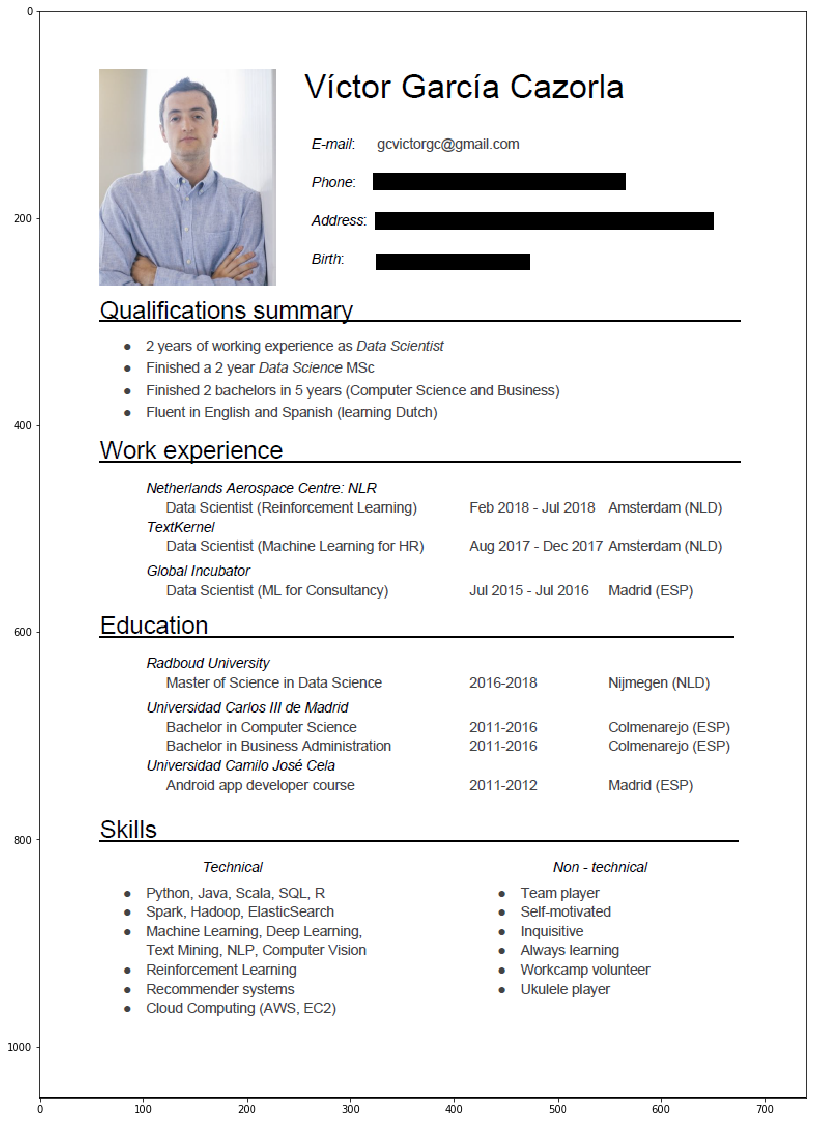

In [3]:
am.search_application(contains = 'victor')

2 applications found containing 'manager'
	81624.png


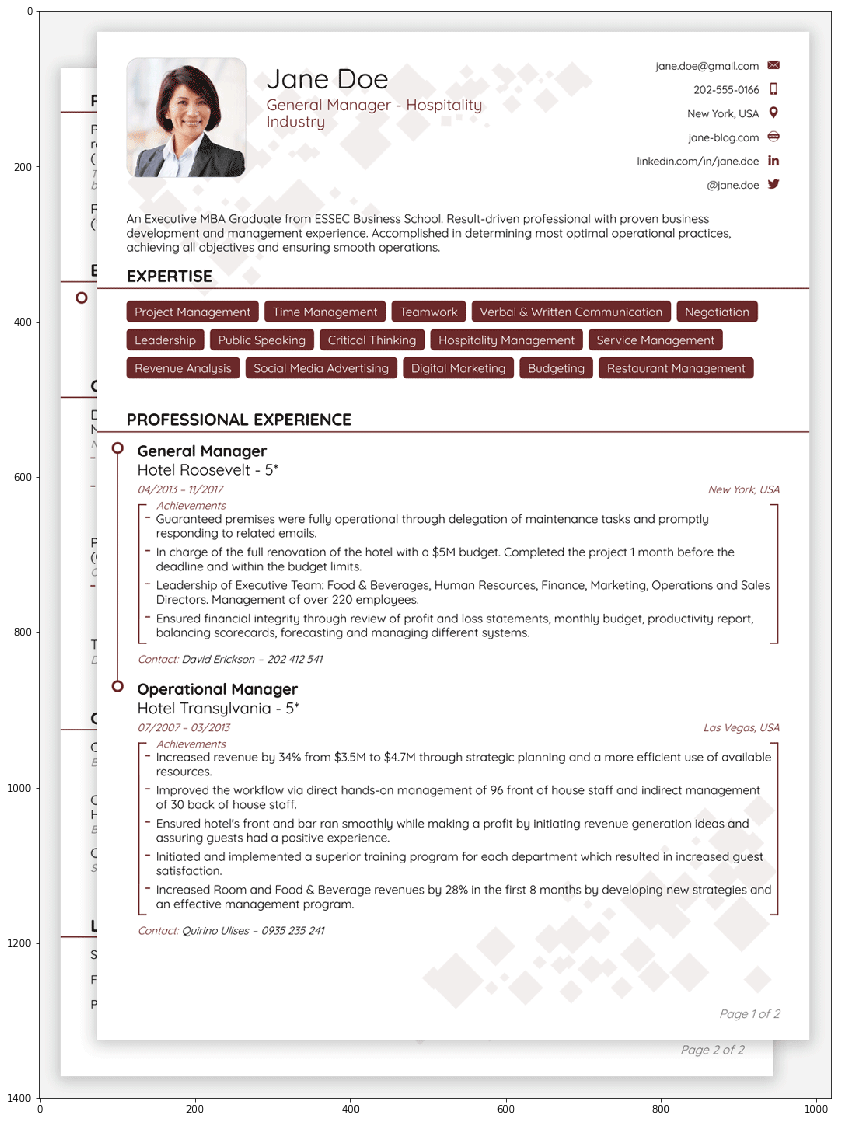

	61218.jpg


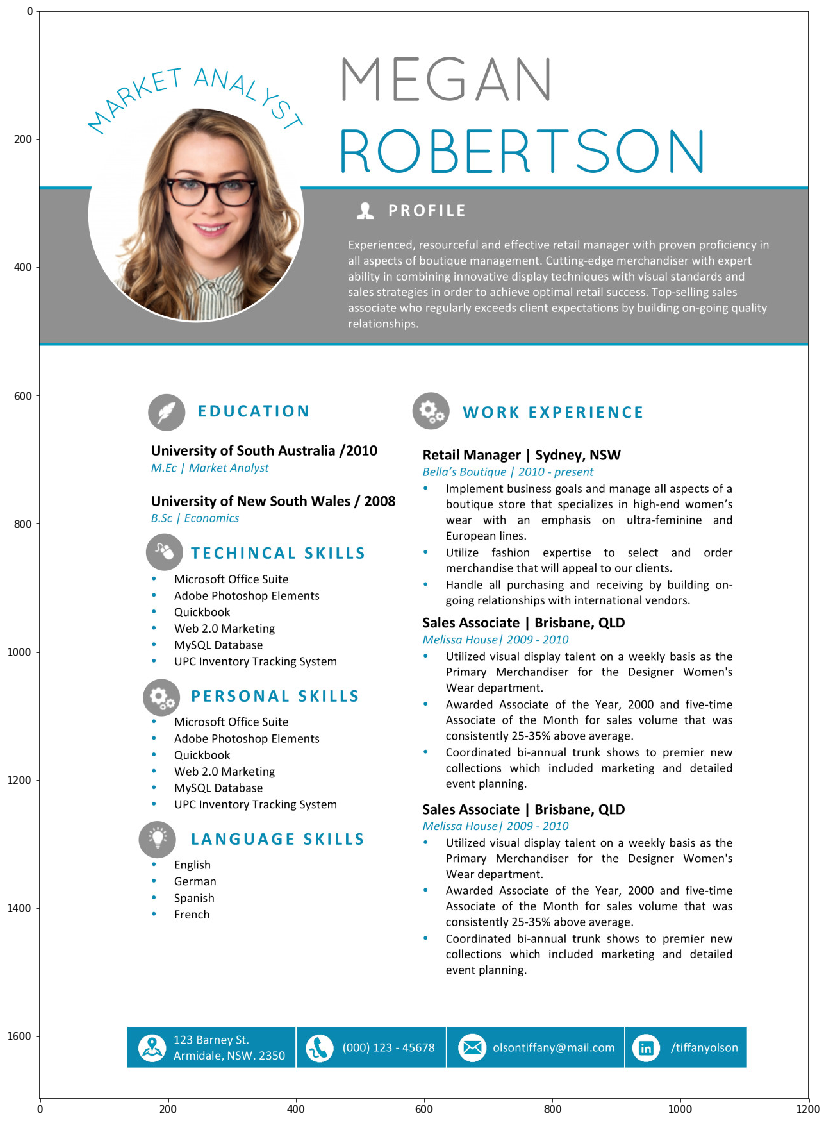

In [4]:
am.search_application(contains = 'manager')

I implemented this notebook in less than half an hour and it gives interesting results but it is far from perfect. For instance it has a low recall because the OCR - without further parameter tuning - makes many mistakes:

In [5]:
am.search_application(contains = 'data scientist')

0 applications found containing 'data scientist'


But my CV does contain the word "data scientist". We see that the text that resulted from the parsing process needs improvement:

In [6]:
am.applications_df.iloc[0]['text']


'Qualiﬁcations summary\n\nﬁnished a Zyear Data Science MSc\n\nWork experience\n\nnemenanas Aemspaoe cenize NLR\n\nData saemsi (Remmcemem Learning)\nTWemel\n\nDam Sclelnls1 (Mamme Leaning lor HR)\nGlobal Incubator\n\nDam Sclelnls1 (ML lnr Collslltancy)\n\n2 years at walking meme as main Scientist\n\nVictor Garcia Cazorla\n\nEmir gwiciorgc@gnai cml\n\nﬁnisnea 2 bamelors In 5yeals (carpi-lei Sauce and Hus-ms)\nFlueni n English and Spanlsn (lean-lg mm)\n\nFeb 2013 , Jul 2018 Amsiemarn (NLD)\n\nAug 2017 , Dec 2017 Amsiemarn (NLD)\n\nJll 2015 , Jul 2016 Mm (ESP)\n\n \n\n \n\nEd ucation\nmama Umvelslly\nMasterm Science in Data Science 20152018 Nunegen (NLD)\nUIm/elslitid Carlos III rte mam!\nBachelor in leplnet Science 201172016 Coimenamp (ESP)\nBachelor in Buslmss Annunisuaiion 201172016 Coimenamp (ESP)\nUIm/elslitid Carrillo José Eda\nAmmo app developer murse 201172012 Mm (ESP)\nSkills\nTechnical Non , 1200mm!\n. Pyllmquava, Sm. SOL R . Teamplayer\n. Spark,Hadoop,Elas1uﬁeacn . Sennmm\n. Mam